# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.metrics import mean_squared_error , r2_score
import google
from sklearn.ensemble import RandomForestRegressor


# Set up GPU memory growth (must be done before creating the model or a TensorFlow session)


In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [3]:
# tensor is multi-dimensional array

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
df = pd.read_csv(r"yield_df.csv")
# df = pd.read_csv(r'/content/drive/MyDrive/DATASETS/yield_df.csv')
df.head(10)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [6]:
df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [7]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [8]:
df[['hg/ha_yield']] = df[['hg/ha_yield']].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  float64
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.5+ MB


In [10]:
encoder = LabelEncoder()
df["Area"] = encoder.fit_transform(df["Area"])
df["Item"] = encoder.fit_transform(df["Item"])

In [11]:
for i in df.columns:
    df[i] = df[i].astype(float)

In [12]:
scalar = MinMaxScaler()
df[['average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','hg/ha_yield']] = scalar.fit_transform(df[['average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','hg/ha_yield']])

In [13]:
X = df.drop('hg/ha_yield',axis = 1)
y = df['hg/ha_yield']

In [14]:
print(X.info(),y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  float64
 1   Item                           28242 non-null  float64
 2   Year                           28242 non-null  float64
 3   average_rain_fall_mm_per_year  28242 non-null  float64
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
dtypes: float64(6)
memory usage: 1.3 MB
<class 'pandas.core.series.Series'>
RangeIndex: 28242 entries, 0 to 28241
Series name: hg/ha_yield
Non-Null Count  Dtype  
--------------  -----  
28242 non-null  float64
dtypes: float64(1)
memory usage: 220.8 KB
None None


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  float64
 1   Item                           28242 non-null  float64
 2   Year                           28242 non-null  float64
 3   hg/ha_yield                    28242 non-null  float64
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(7)
memory usage: 1.5 MB


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,test_size=0.3)

In [17]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train =  tf.convert_to_tensor(y_train)
y_test =  tf.convert_to_tensor(y_test)

In [18]:
y_train = np.reshape(y_train,(-1,1))
y_test = np.reshape(y_test,(-1,1))

In [19]:
model = Sequential()
model.add(Dense(12 , input_dim = 6, activation = 'relu'))
model.add(Dense(1 , activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                84        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='mse', metrics = ['mse','mae'])

In [21]:
history = model.fit(X_train,y_train,epochs = 20 ,batch_size = 500,validation_split = 0.2)

Epoch 1/20
32/32 [==============================] - 1s 10ms/step - loss: 130313.8672 - mse: 130313.8672 - mae: 355.9079 - val_loss: 67982.8047 - val_mse: 67982.8047 - val_mae: 260.5590
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 37731.0625 - mse: 37731.0625 - mae: 189.6614 - val_loss: 13903.3926 - val_mse: 13903.3926 - val_mae: 117.6153
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 5519.0024 - mse: 5519.0024 - mae: 69.1950 - val_loss: 831.9780 - val_mse: 831.9780 - val_mae: 27.6637
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 199.7959 - mse: 199.7959 - mae: 10.6368 - val_loss: 33.3585 - val_mse: 33.3585 - val_mae: 4.8112
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 17.7965 - mse: 17.7965 - mae: 3.2994 - val_loss: 7.9626 - val_mse: 7.9626 - val_mae: 2.3482
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 10.7996 - mse: 10.7996 - mae: 2.6919 - val_loss: 9.795

# evaluating model performance

In [22]:
model.evaluate(X_test,y_test)

265/265 [==============================] - 1s 2ms/step - loss: 4.8135 - mse: 4.8135 - mae: 2.0935


[4.813543796539307, 4.813543796539307, 2.0934793949127197]

# Calculating RMSE

In [23]:
pred_train = model.predict(X_train)
print('RMSE for train data: ',np.sqrt(mean_squared_error(y_train,pred_train)))
pred_test = model.predict(X_test)
print('RMSE for test data: ',np.sqrt(mean_squared_error(y_test,pred_test)))

RMSE for train data:  2.17326452868921
RMSE for test data:  2.1939792781793375


# model is not overfitted

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


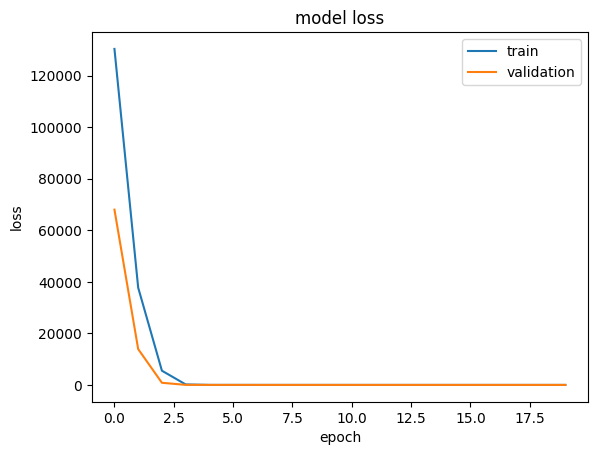

In [24]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# increasing the number of hidden layer

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
32/32 [==============================] - 1s 10ms/step - loss: 32709.0391 - mse: 32709.0391 - mae: 148.1068 - val_loss: 340.6402 - val_mse: 340.6402 - val_mae: 17.4457
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 64.0682 - mse: 64.0682 - mae: 6.2012 - val_loss: 34.5125 - val_mse: 34.5125 - val_mae: 4.9776
Epoch 3/20
32/32 [===================

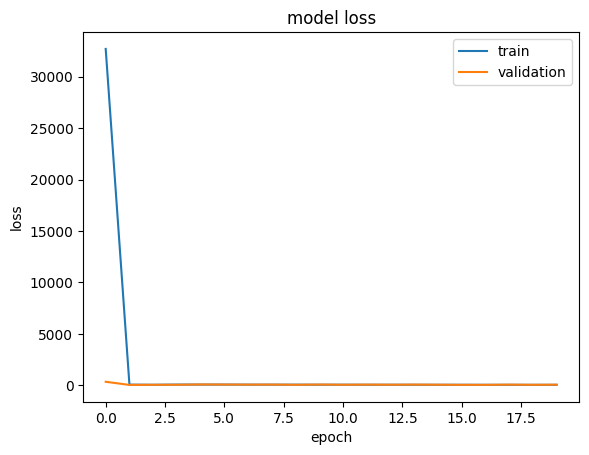

In [25]:
model = Sequential()
model.add(Dense(12 , input_dim = 6, activation = 'relu'))
model.add(Dense(12 , activation = 'relu'))
model.add(Dense(1 , activation='linear'))
print(model.summary())
model.compile(loss='mse', metrics = ['mse','mae'])
history = model.fit(X_train,y_train,epochs = 20 ,batch_size = 500,validation_split = 0.2)
print(model.evaluate(X_test,y_test))
pred_train = model.predict(X_train)
print('RMSE for train data: ',np.sqrt(mean_squared_error(y_train,pred_train)))
pred_test = model.predict(X_test)
print('RMSE for test data: ',np.sqrt(mean_squared_error(y_test,pred_test)))
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#adding layer and increasing epochs

In [26]:
model = Sequential()
model.add(Dense(12 , input_dim = 6, activation = 'relu'))
model.add(Dense(12 , activation = 'relu'))
model.add(Dense(1 , activation='linear'))
print(model.summary())
model.compile(loss='mse', metrics = ['mse','mae'])
history = model.fit(X_train,y_train,epochs = 30 ,batch_size = 100,validation_split = 0.2)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_6 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
159/159 [==============================] - 1s 3ms/step - loss: 28557.5801 - mse: 28557.5801 - mae: 68.1541 - val_loss: 207.3182 - val_mse: 207.3182 - val_mae: 14.3640
Epoch 2/30
159/159 [==============================] - 0s 2ms/step - loss: 225.4302 - mse: 225.4302 - mae: 14.9532 - val_loss: 221.1842 - val_mse: 221.1842 - val_mae: 14.8499
Epoch 3/30
159/159 [=========


265/265 [==============================] - 1s 2ms/step - loss: 124.9073 - mse: 124.9073 - mae: 11.1726
[124.90734100341797, 124.90734100341797, 11.172626495361328]

RMSE for train data:  11.178633083831615

RMSE for test data:  11.176196003685403

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


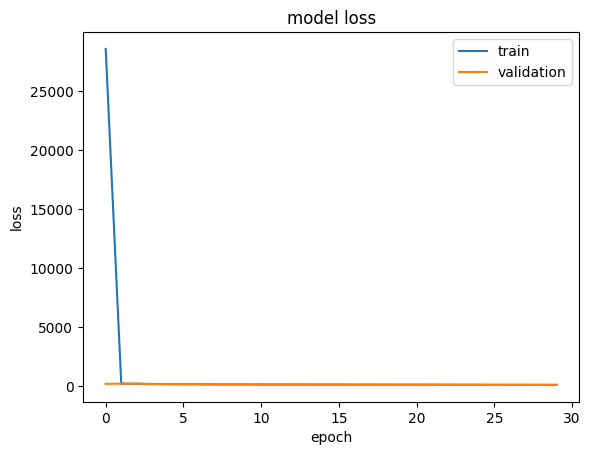

In [27]:
print()
print(model.evaluate(X_test,y_test))
pred_train = model.predict(X_train)
print()
print('RMSE for train data: ',np.sqrt(mean_squared_error(y_train,pred_train)))
pred_test = model.predict(X_test)
print()
print('RMSE for test data: ',np.sqrt(mean_squared_error(y_test,pred_test)))
print()
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [28]:
RF = RandomForestRegressor()
model_rf = RF.fit(X_train,y_train)


print('Training accuracy =',model_rf.score(X_train,y_train))
print('Testing accuracy =',model_rf.score(X_test,y_test))
print()


pred_train = model_rf.predict(X_train)
print()
print('RMSE for train data: ',np.sqrt(mean_squared_error(y_train,pred_train)))
pred_test = model_rf.predict(X_test)
print()
print('RMSE for test data: ',np.sqrt(mean_squared_error(y_test,pred_test)))

C:\Users\sitar\AppData\Local\Temp\ipykernel_15172\2265090091.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = RF.fit(X_train,y_train)


Training accuracy = 0.9978965026985975
Testing accuracy = 0.9860096980597248


RMSE for train data:  0.007759488743690194

RMSE for test data:  0.020114624585242935
